# Association Rules Learning (ARL)

### What is the Association Rules Learning?

It is a rule-based machine learning technique used to find patterns (relationships, structures) in the data.

Association analysis applications are among the most common applications in data science. It will also coincide as Recommendation Systems.

These applications may have come up in the following ways, such as "bought this product that bought that product" or "those who viewed that ad also looked at these ads" or "we created a playlist for you" or "recommended video for the next video".

These scenarios are the most frequently encountered scenarios within the scope of e-commerce data science data mining studies.

In Turkey and the world's largest e-commerce companies spotify, amazon, it uses many platforms like netflix recommendation systems can know a little more closely.
So what does this association analysis summarize?
Apriori Algorithm

It is the most used method in this field.

Association rule analysis is carried out by examining some metrics:

    Support Support(X, Y) = Freq(X,Y)/N

      X: Product
      Y: Product
      N: Total Shopping

    Confidence

      Confidence (X, Y) = Freq (X, Y) / Freq (X)

    Lift (The purchase of one product increases the level of purchase of the other.)

      Lift = Support (X, Y) / (Support (X) * Support (Y))



In [24]:
print(14 * " >", "\t\t n.B.a. \t", "< " * 14, "\n\n\n")

import pandas as pd
import gc
import time
from contextlib import contextmanager
from helpers.helpers import get_namespace, check_df, outlier_thresholds, replace_with_thresholds,\
retail_data_prep, create_invoice_product_df, create_rules, check_id, arl_recommender

import sys
sys.argv = [sys.argv[0]]

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 15)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.expand_frame_repr', False)


@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s\n\n".format(title, time.time() - t0))


def main(debug=False):
    with timer("Reading data ..."):
        df_ = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2010-2011")
        df = df_.copy()
        gc.collect()

    with timer("Checking Data ..."):
        # Check data
        check_df(df)
        gc.collect()

    with timer("Data Pre-Processing ..."):
        # df preperation
        df_prep = retail_data_prep(df)
        gc.collect()

    with timer("\n\nPreparing Rules and Products accordings to Consequents ..."):
        print("Rules are:\n")
        rules = create_rules(df_prep)
        gc.collect()
        
    with timer("\nCheck id's ..."):
        product_id = 22492
        print("List of '22492' StockCode id product:\n\n", check_id(df, product_id), end="\n\n")
        gc.collect()
        
    
        # This is Application on a sample country (Ornek bir ulke uygulamasi)
    with timer("\nRecommendations by German Customer Segments ..."):
        
        print("Recommend 1 product for StockCode id == '22492':\n\n", arl_recommender(rules, 22492, 1), end="\n\n")
        print("Recommend 2 product for StockCode id == '22492':\n\n", arl_recommender(rules, 22492, 2), end="\n\n")
        print("Recommend 3 product for StockCode id == '22492':\n\n", arl_recommender(rules, 22492, 3), end="\n\n")
        gc.collect()

if __name__ == "__main__":
    namespace = get_namespace()

    with timer("Full model run"):
        main(debug=True)


 > > > > > > > > > > > > > > 		 n.B.a. 	 < < < < < < < < < < < < < <  



Reading data ... - done in 207s



        ##################### Shape #####################

	(541910, 8)


        ##################### Types #####################

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object


        ##################### Head #####################

  Invoice StockCode                         Description  Quantity  \
0  536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                 WHITE METAL LANTERN         6   
2  536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

          InvoiceDate  Price  Customer ID         Country  
0 2010-12-01 08:26:00  2.550    17850.000  United Kingdom  
1 2010-12-01 08:26:00  3.390    17850.000  Unit

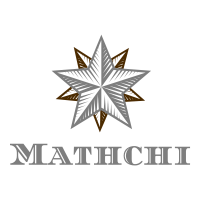

In [19]:
from IPython.display import Image
Image("mathchi.png")